In [1]:
#import required libraries
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/rossmann-store-sales/final_RossmannSales.csv", index_col=0)

In [3]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,Season,Holiday per week,Avg CustomersPerMonth,Avg CustomersPerWeek,PromoCountperWeek,CompetitionOpenSince,CompetitionDistanceLOG,State,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1,0,0,1270.0,9,2008,0,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,0,5,654.703236,701.697758,8,2008-09-01,7.146772,HE,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,40.0,0.0,1.0,1,13
1,56,2,1,6620.0,3,2012,1,5,2015-07-31,10022,619,1,1,0,1,2015,7,31,3,0,5,654.703236,701.697758,8,2012-03-01,8.797851,HE,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,40.0,0.0,1.0,1,13
2,69,0,1,1130.0,1,2013,1,5,2015-07-31,11204,1371,1,1,0,1,2015,7,31,3,0,5,654.703236,701.697758,8,2013-01-01,7.029973,HE,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,40.0,0.0,1.0,1,13
3,77,2,1,1090.0,8,2009,1,5,2015-07-31,10335,780,1,1,0,1,2015,7,31,3,0,5,654.703236,701.697758,8,2009-08-01,6.993933,HE,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,40.0,0.0,1.0,1,13
4,111,2,1,7890.0,1,2013,1,5,2015-07-31,8897,698,1,1,0,1,2015,7,31,3,0,5,654.703236,701.697758,8,2013-01-01,8.973351,HE,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,40.0,0.0,1.0,1,13


In [4]:
#encoding State variables
p=0
for j in df["State"].unique():
   df["State"]=np.where(df["State"]==j,p,df["State"])
   p=p+1
df["State"]=df["State"].astype(int)

In [5]:
#Splitting of time series dataset
df = df.sort_values(by="Date")

In [6]:
df.shape

(973532, 49)

In [7]:
X_train=df[:int(df.shape[0]*80/100)].drop(columns=["Date","Sales","CompetitionOpenSince"])
Y_train=df[:int(df.shape[0]*80/100)]["Sales"]
X_test=df[int(df.shape[0]*80/100):].drop(columns=["Date","Sales","CompetitionOpenSince"])
Y_test=df[int(df.shape[0]*80/100):]["Sales"]

In [8]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(778825, 46) (778825,) (194707, 46) (194707,)


## Using Linear Regression to predict 'Sales'

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
linear_reg_model=LinearRegression()
linear_reg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_pred=linear_reg_model.predict(X_test)
pred_df=pd.DataFrame({'Predictions':y_pred,'Actual':Y_test})
pred_df=pred_df.reset_index(drop=True)
pred_df.head()

,Predictions,Actual
0,6232.215508,7408
1,7831.881042,6498
2,7882.589002,8640
3,8694.671047,8951
4,6603.890340,5498


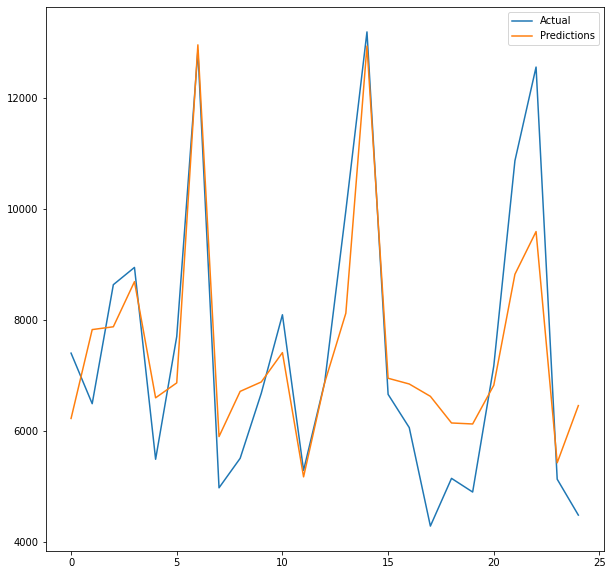

In [12]:
plt.figure(figsize=(10,10))
pred_df["Actual"][:25,].plot.line()
pred_df["Predictions"][:25,].plot.line()
plt.legend()
plt.show()

In [13]:
linear_reg_model.score(X_test,Y_test)

0.8655956834401923

## Using Lasso Regression to predict 'Sales'

In [14]:
from sklearn.linear_model import Lasso
Lasso_reg_model = Lasso(alpha=2)
Lasso_reg_model.fit(X_train,Y_train)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [15]:
y_pred=Lasso_reg_model.predict(X_test)
pred_df=pd.DataFrame({'Predictions':y_pred,'Actual':Y_test})
pred_df=pred_df.reset_index(drop=True)
pred_df.head()

,Predictions,Actual
0,6185.581693,7408
1,7800.199253,6498
2,7851.338074,8640
3,8665.094855,8951
4,6566.102524,5498


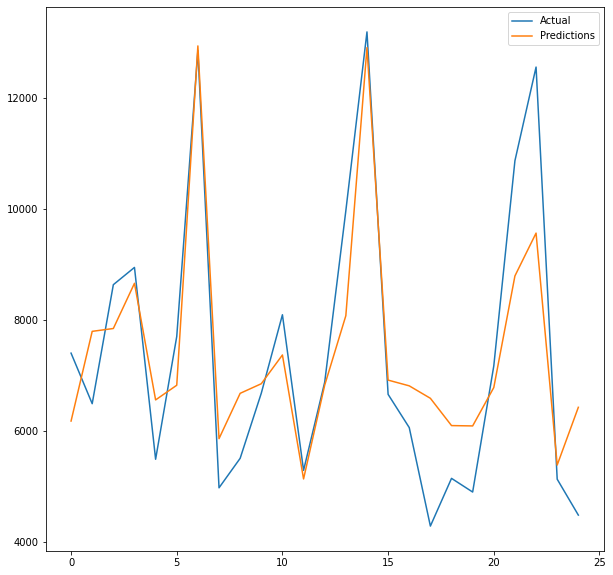

In [16]:
plt.figure(figsize=(10,10))
pred_df["Actual"][:25,].plot.line()
pred_df["Predictions"][:25,].plot.line()
plt.legend()
plt.show()

In [17]:
Lasso_reg_model.score(X_test,Y_test)

0.8656564687784142

## Using Gradient Boosted Decision Trees to predict 'Sales'

In [18]:
import lightgbm as lgb
base_lgb_model = lgb.LGBMRegressor(n_leaves=50,
                               n_estimators=700, 
                               max_depth=-1,  
                               learning_rate=0.3, #0.1
                               subsample=1,
                               colsample_bytree=0.8,
                               reg_alpha=0.1,
                               reg_lambda=1)

base_lgb_model.fit(X_train, Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
              importance_type='split', learning_rate=0.3, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=700, n_jobs=-1, n_leaves=50, num_leaves=31,
              objective=None, random_state=None, reg_alpha=0.1, reg_lambda=1,
              silent=True, subsample=1, subsample_for_bin=200000,
              subsample_freq=0)

In [19]:
y_pred=base_lgb_model.predict(X_test)
pred_df=pd.DataFrame({'Predictions':y_pred,'Actual':Y_test})
pred_df=pred_df.reset_index(drop=True)
pred_df.head()

,Predictions,Actual
0,7107.060717,7408
1,6581.081073,6498
2,7895.643598,8640
3,8817.814163,8951
4,5599.386968,5498


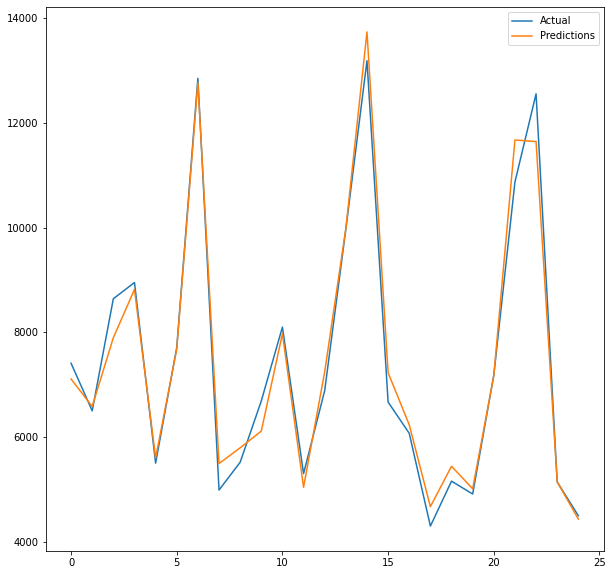

In [20]:
plt.figure(figsize=(10,10))
pred_df["Actual"][:25,].plot.line()
pred_df["Predictions"][:25,].plot.line()
plt.legend()
plt.show()

In [21]:
base_lgb_model.score(X_test,Y_test)

0.9825503390455218

## Time Series Analysis

In [22]:
import random
time_features=df[["Year","Month","Day",	"Week",	"Season", "Promo", "Open","Store","Sales","Date"]]
#Choose a random store
x=random.randint(1,1115)
print(x)
time_features=time_features.loc[time_features['Store'] == x]

930


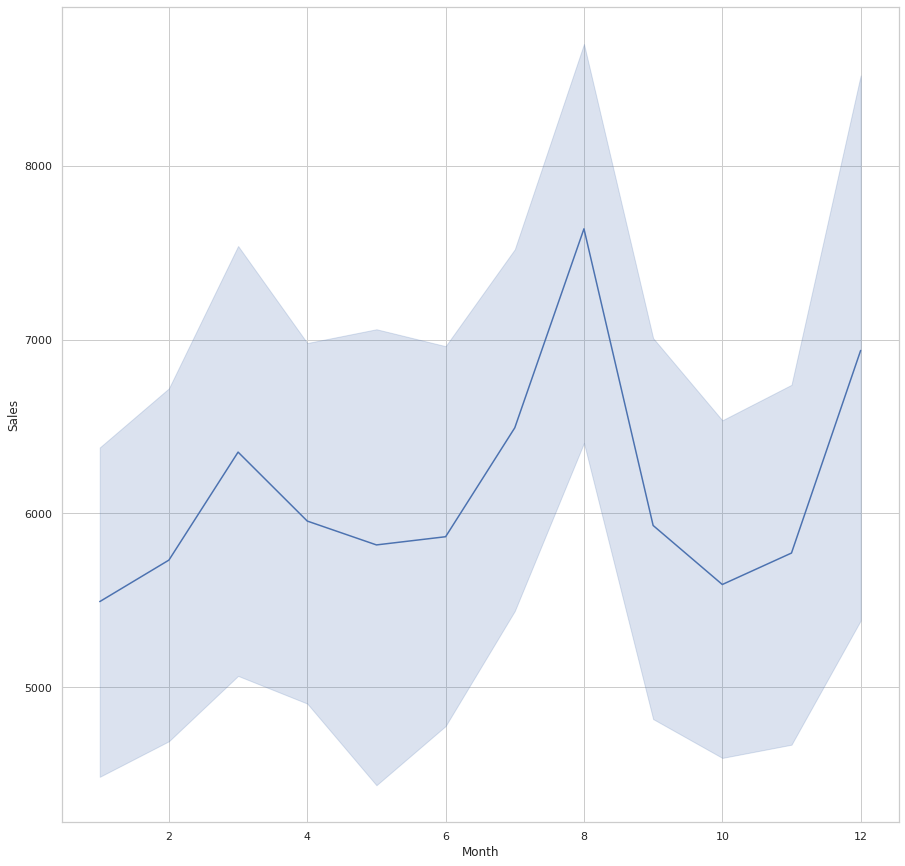

In [23]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")
sns.lineplot(x="Month", y="Sales", data=time_features.loc[time_features['Year'] == 2013])

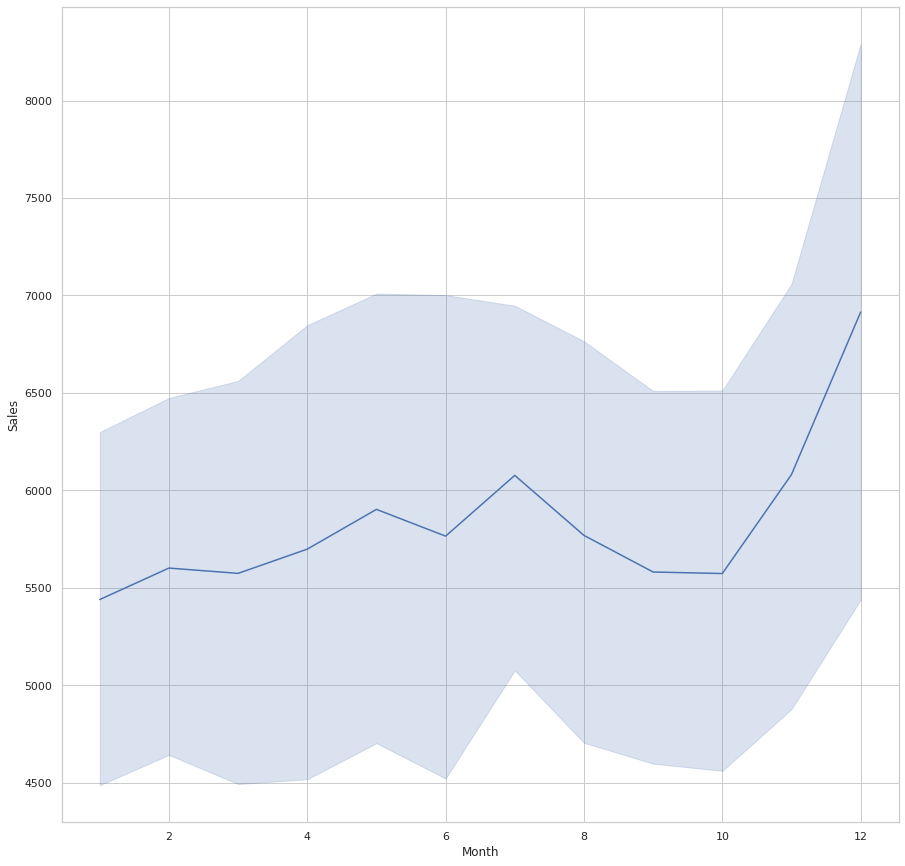

In [24]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")
sns.lineplot(x="Month", y="Sales", data=time_features.loc[time_features['Year'] == 2014])

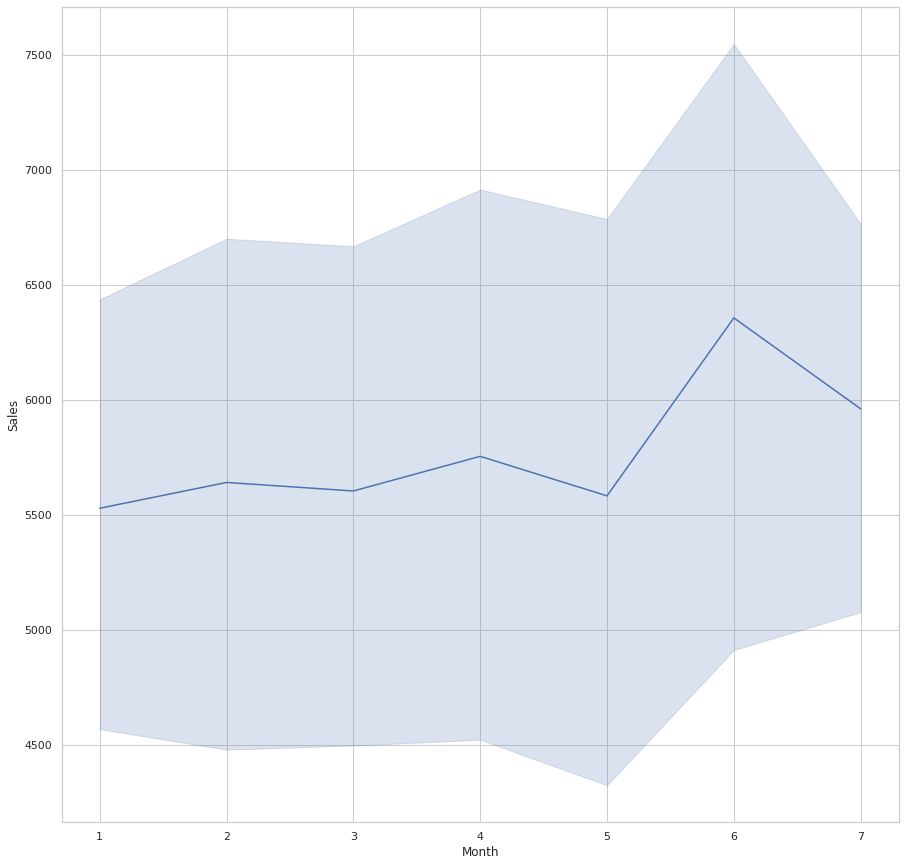

In [25]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")
sns.lineplot(x="Month", y="Sales", data=time_features.loc[time_features['Year'] == 2015])

as there are no clear cyclic trends of Sales against Time series, making RNN seems like a moot point

In [26]:
import tensorflow as tf
import keras
import keras.backend as kb

In [27]:
time_target=time_features["Sales"]
time_features=time_features.drop(columns=["Sales","Date"])

In [28]:
X_train=time_features[:int(time_features.shape[0]*80/100)]
Y_train=time_target[:int(time_target.shape[0]*80/100)]
X_test=time_features[int(time_features.shape[0]*80/100):int(df.shape[0]*95/100)]
Y_test=time_target[int(time_target.shape[0]*80/100):int(df.shape[0]*95/100)]
X_val=time_features[int(time_features.shape[0]*95/100):]
Y_val=time_target[int(time_target.shape[0]*95/100):]

In [29]:
time_model=keras.models.Sequential()
time_model.add(keras.layers.Embedding(input_dim=2500, output_dim=4, input_length=8))
time_model.add(keras.layers.LSTM(256, return_sequences=True))
time_model.add(keras.layers.LSTM(256, return_sequences=True))
time_model.add(keras.layers.Dense(64, activation="relu")) 
time_model.add(keras.layers.Dense(1))

In [30]:
time_model.compile(optimizer="adam",metrics=["mean_absolute_error"],loss="mean_squared_error")

In [31]:
hist=time_model.fit(X_train,Y_train,batch_size=50,epochs=30,validation_data=(X_val,Y_val))

Epoch 1/30
15/15 [==============================] - 2s 139ms/step - loss: 45904752.0000 - mean_absolute_error: 5977.8296 - val_loss: 44643612.0000 - val_mean_absolute_error: 6091.6138
Epoch 2/30
15/15 [==============================] - 1s 88ms/step - loss: 45598496.0000 - mean_absolute_error: 5961.2627 - val_loss: 44208820.0000 - val_mean_absolute_error: 6064.9175
Epoch 3/30
15/15 [==============================] - 1s 91ms/step - loss: 45154032.0000 - mean_absolute_error: 5936.6265 - val_loss: 43719624.0000 - val_mean_absolute_error: 6034.6782
Epoch 4/30
15/15 [==============================] - 1s 91ms/step - loss: 44612148.0000 - mean_absolute_error: 5906.2583 - val_loss: 43108440.0000 - val_mean_absolute_error: 5996.6006
Epoch 5/30
15/15 [==============================] - 1s 87ms/step - loss: 43950552.0000 - mean_absolute_error: 5869.8408 - val_loss: 42384012.0000 - val_mean_absolute_error: 5951.0146
Epoch 6/30
15/15 [==============================] - 1s 87ms/step - loss: 43184524.00

In [32]:
results=time_model.evaluate(X_test,Y_test)
for i in range(len(time_model.metrics_names)):
  print(time_model.metrics_names[i],":",results[i])

6/6 [==============================] - 0s 20ms/step - loss: 11822445.0000 - mean_absolute_error: 3087.1687
loss : 11822445.0
mean_absolute_error : 3087.168701171875


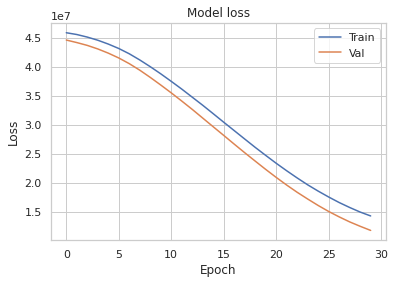

In [33]:
plt.plot(hist.history['loss'][:30])
plt.plot(hist.history['val_loss'][:30])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()